## Accessing GBIF data with the Planetary Computer STAC API

This notebook provides an example of accessing [Global Biodiversity Information Facility](https://planetarycomputer.microsoft.com/dataset/gbif) (GBIF) occurrence data from the Planetary Computer STAC API. Periodic snapshots of the data are stored in Parquet format.

We'll use [Dask](https://docs.dask.org/en/latest/) to read the partitioned Parquet Dataset.

In [1]:
import pystac_client

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
)
search = catalog.search(collections=["gbif"])
items = search.get_all_items()
items = {x.id: x for x in items}
list(items)

['gbif-2021-09-01',
 'gbif-2021-08-01',
 'gbif-2021-07-01',
 'gbif-2021-06-01',
 'gbif-2021-04-13']

We'll take the most recent item.

In [2]:
item = list(items.values())[0]
item

<Item id=gbif-2021-09-01>

As usual, you should sign the item before trying to load the data.

In [3]:
import planetary_computer

signed_asset = planetary_computer.sign(item).assets["data"]

In [4]:
import dask.dataframe as dd

df = dd.read_parquet(
    signed_asset.href,
    storage_options=signed_asset.extra_fields["table:storage_options"],
)
df

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,infraspecificepithet,taxonrank,scientificname,verbatimscientificname,verbatimscientificnameauthorship,countrycode,locality,stateprovince,occurrencestatus,individualcount,publishingorgkey,decimallatitude,decimallongitude,coordinateuncertaintyinmeters,coordinateprecision,elevation,elevationaccuracy,depth,depthaccuracy,eventdate,day,month,year,taxonkey,specieskey,basisofrecord,institutioncode,collectioncode,catalognumber,recordnumber,identifiedby,dateidentified,license,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
npartitions=1034,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int32,object,float64,float64,float64,float64,float64,float64,float64,float64,object,int32,int32,int32,int32,int32,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


As indicated by `npartitions`, this Parquet dataset is made up of many individual parquet files. We can read in a specific partition with `.get_partition`

In [5]:
chunk = df.get_partition(0).compute()
chunk

,gbifid,datasetkey,occurrenceid,kingdom,phylum,class,order,family,genus,species,...,identifiedby,dateidentified,license,rightsholder,recordedby,typestatus,establishmentmeans,lastinterpreted,mediatype,issue
0,321355870,67fb29a4-f762-11e1-a439-00145eb45e9a,None,Chromista,Foraminifera,Globothalamea,Rotaliida,Globigerinidae,Globigerina,Globigerina bulloides,...,None,None,CC_BY_4_0,None,"Schiebel, Ralf",None,None,2021-06-14T23:58:35.923Z,[],[]
1,321355956,67fb29a4-f762-11e1-a439-00145eb45e9a,None,Chromista,Foraminifera,Globothalamea,Rotaliida,Globorotaliidae,Neogloboquadrina,Neogloboquadrina pachyderma,...,None,None,CC_BY_4_0,None,"Schiebel, Ralf",None,None,2021-06-14T23:58:35.924Z,[],[]
2,321355949,67fb29a4-f762-11e1-a439-00145eb45e9a,None,Chromista,Foraminifera,Globothalamea,Rotaliida,Globigerinitidae,Globigerinita,Globigerinita minuta,...,None,None,CC_BY_4_0,None,"Schiebel, Ralf",None,None,2021-06-14T23:58:35.926Z,[],[]
3,321355912,67fb29a4-f762-11e1-a439-00145eb45e9a,None,Chromista,Foraminifera,Globothalamea,Rotaliida,Globigerinitidae,Globigerinita,Globigerinita glutinata,...,None,None,CC_BY_4_0,None,"Schiebel, Ralf",None,None,2021-06-14T23:58:35.927Z,[],[]
4,321355905,67fb29a4-f762-11e1-a439-00145eb45e9a,None,Chromista,Foraminifera,Globothalamea,Rotaliida,Globigerinidae,Globigerina,Globigerina falconensis,...,None,None,CC_BY_4_0,None,"Schiebel, Ralf",None,None,2021-06-14T23:58:35.928Z,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667009,1322591709,821cc27a-e3bb-4bc5-ac34-89ada245069d,http://n2t.net/ark:/65665/3ee636308-1443-45be-...,Animalia,Arthropoda,Malacostraca,Decapoda,Processidae,Processa,Processa bermudensis,...,"Mclaughlin, P.",None,CC0_1_0,None,Continental Shelf Associates for BLM/ MMS,None,None,2021-06-27T10:49:36.284Z,[StillImage],[OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_CO...
1667010,1322595622,821cc27a-e3bb-4bc5-ac34-89ada245069d,http://n2t.net/ark:/65665/3ee8fc491-fa05-4edc-...,Animalia,Chordata,Mammalia,Rodentia,Muridae,Hybomys,Hybomys univittatus,...,None,None,CC0_1_0,None,J. Malcolm,None,None,2021-06-27T10:50:21.046Z,[StillImage],[OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_CO...
1667011,1322597346,821cc27a-e3bb-4bc5-ac34-89ada245069d,http://n2t.net/ark:/65665/3eea331a2-d225-4e88-...,Animalia,Chordata,Amphibia,Caudata,Plethodontidae,Plethodon,Plethodon montanus,...,None,None,CC0_1_0,None,None,None,None,2021-06-27T10:49:36.308Z,[],[OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_CO...
1667012,1322605552,821cc27a-e3bb-4bc5-ac34-89ada245069d,http://n2t.net/ark:/65665/3eeff553c-637b-4742-...,Animalia,Chordata,Thaliacea,Salpida,Salpidae,Salpa,None,...,"Cole, Linda L., (IZ), Smithsonian Institution ...",None,CC0_1_0,None,Schuyler,None,None,2021-06-27T10:50:57.439Z,[],[OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_CO...


To get a sense for the most commonly observed species, we'll group the dataset and get the count of each species.

In [6]:
chunk.groupby(["kingdom", "phylum", "class", "family", "genus"])[
    "species"
].value_counts().sort_values(ascending=False).head(15)

kingdom   phylum    class           family       genus          species                    
Animalia  Chordata  Aves            Sulidae      Sula           Sula variegata                 143568
                    Actinopterygii  Percidae     Perca          Perca fluviatilis               48700
                                    Cyprinidae   Rutilus        Rutilus rutilus                 39743
                                    Esocidae     Esox           Esox lucius                     37786
                                    Percidae     Gymnocephalus  Gymnocephalus cernua            23030
                                    Cyprinidae   Abramis        Abramis brama                   17225
                                    Lotidae      Lota           Lota lota                       15668
                                    Cyprinidae   Alburnus       Alburnus alburnus               14580
                                    Salmonidae   Coregonus      Coregonus maraena           

Let's create a map with the number of unique species per country. First, we'll group by country code and compute the number of unique species (per country).

In [7]:
species_per_country = chunk.groupby("countrycode").species.nunique()
species_per_country

countrycode
AD      6
AE     55
AF     32
AG     51
AI     37
     ... 
YE     19
YT      5
ZA    688
ZM     82
ZW     91
Name: species, Length: 243, dtype: int64

Finally, we can plot the counts on a map using geopandas, by joining `species_per_country` to a dataset with country boundaries.

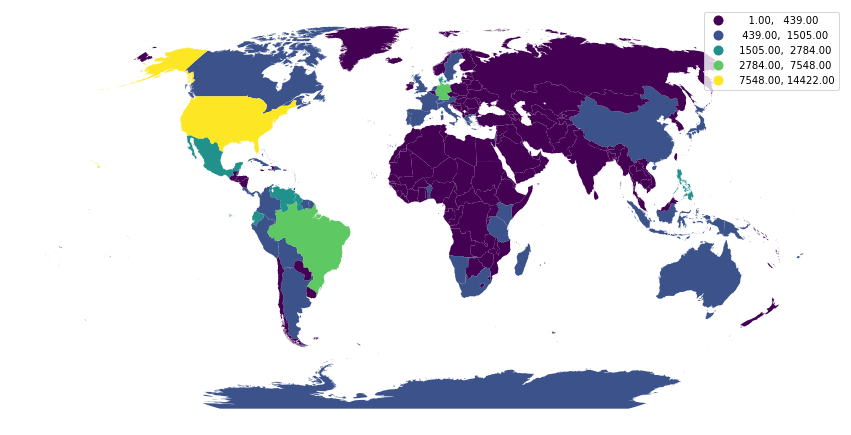

In [8]:
import geopandas
import cartopy

countries = geopandas.read_file(
    "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
)
gdf = geopandas.GeoDataFrame(
    countries.merge(species_per_country, left_on="ISO_A2", right_index=True)
)
crs = cartopy.crs.Robinson()
ax = gdf.to_crs(crs.proj4_init).plot(
    column="species", legend=True, scheme="natural_breaks", k=5, figsize=(15, 15)
)
ax.set_axis_off()

### Working with the full dataset

Thus far, we've just used a single partition from the full GBIF dataset. All of the examples shown in this notebook work on the entire dataset using `dask.dataframe` to read in the Parquet dataset.

You might want create a cluster to process the data in parallel on many machines.

```python
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(16)
client = cluster.get_client()
```

Then use `dask.dataframe.read_parquet` to read in the files. To speed things up even more, we'll specify a subset of files to read in.

```python
df = dd.read_parquet(
    signed_asset.href,
    columns=["countrycode", "species"],
    storage_options=signed_asset.extra_fields["table:storage_options"],
)
```

Now you can repeat the computations above, replacing `chunk` with `df`.

### Next Steps

Now that you've an introduction to the Forest Inventory and Analysis dataset, learn more with

* The [Reading tabular data quickstart](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-tabular-data/) for an introduction to tabular data on the Planeatry Computer
* [Scale with Dask](https://planetarycomputer.microsoft.com/docs/quickstarts/scale-with-dask/) for more on using Dask to work with large datasets